First 5 rows of the dataset:
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude    

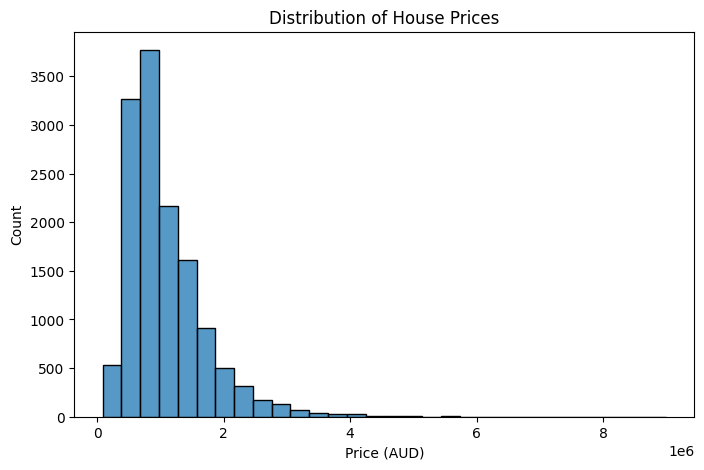


Selected columns:
Index(['Suburb', 'Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'Price'],
      dtype='object')

Missing values: Suburb              0
Rooms               0
Type                0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Regionname          0
Propertycount       0
Price               0
dtype: int64

Suburb: Unique = 314, Duplicate % = 97.7%

Rooms: Unique = 9, Duplicate % = 99.9%

Type: Unique = 3, Duplicate % = 100.0%

Distance: Unique = 202, Duplicate % = 98.5%

Bedroom2: Unique = 12, Duplicate % = 99.9%

Bathroom: Unique = 9, Duplicate % = 99.9%

Car: Unique = 11, Duplicate % = 99.9%

Landsize: Unique = 1448, Duplicate % = 89.3%

BuildingArea: Unique = 602, Duplicate % = 95.6%

YearBuilt: Unique = 144, Duplicate % = 98.9%

Regionname: Unique = 8, Duplicate 

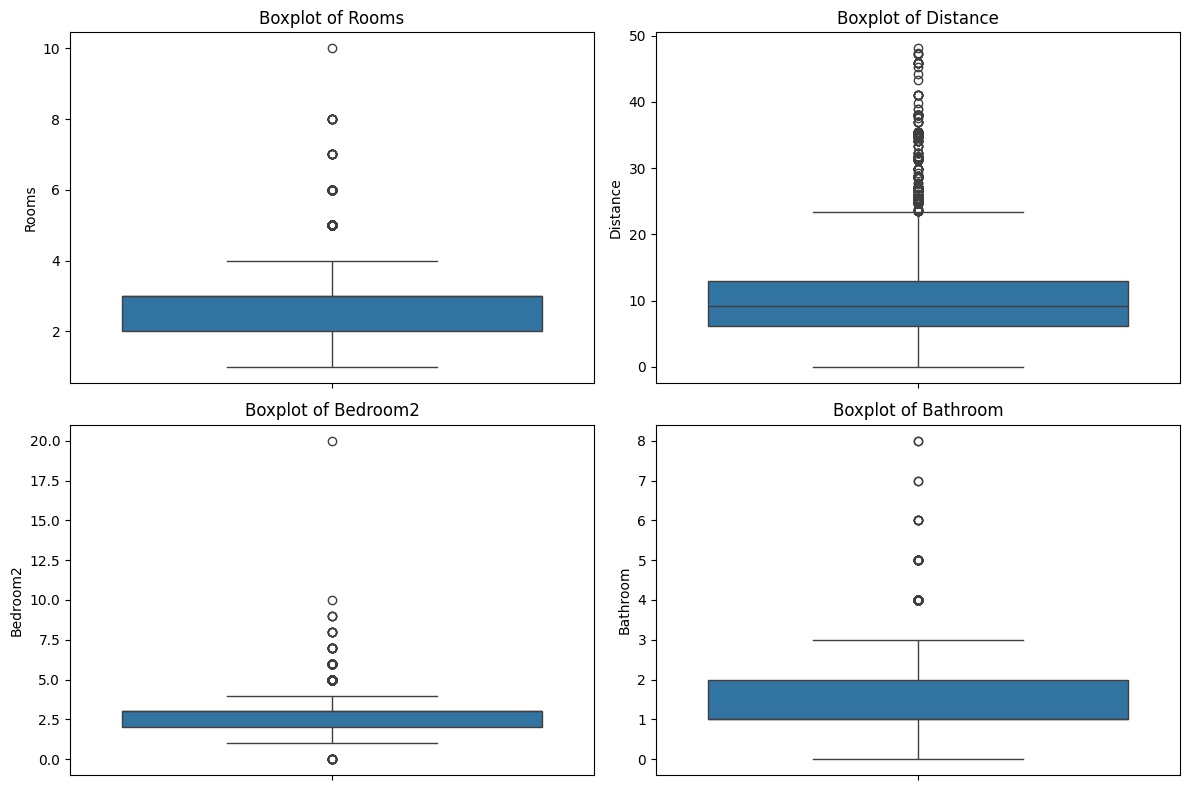

Correlation Rooms vs Price: 0.497
Correlation Bedroom2 vs Price: 0.476
Correlation Rooms vs Bedroom2: 0.944
Correlation Propertycount vs Price: -0.042

Missing values after KNN:
Suburb          0
Rooms           0
Type            0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
Regionname      0
Price           0
dtype: int64

Outliers in 'Rooms:
count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64
Z-score outliers (>3 std): 86 values, e.g. [6.0, 6.0, 6.0, 6.0, 8.0]
IQR outliers: 682 values

Outliers in 'Distance:
count    13580.000000
mean        10.137776
std          5.868725
min          0.000000
25%          6.100000
50%          9.200000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64
Z-score outliers (>3 std): 246 values, e.g. [35.2, 34.7, 38.0

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import KNNImputer


df = pd.read_csv('melb_data.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nInfo about the dataset:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

#Vizualization
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price (AUD)')
plt.ylabel('Count')
plt.show()

#Analysing of the columns
important_cols = [ 'Suburb', 'Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount']
df = df[important_cols + ['Price']]

print("\nSelected columns:")
print(df.columns)
"""
-чекнути кореляції схожих колонок(Rooms i Bedroom2) і їх кореляцію або просто кореляцію з міткою(Propertycount i Price)
-привести в порядок дані: знайти null, None, outlayers(пообробляти вийнятки: значення площі ділянки та площі будівель), duplicates.
-і вже ідеальні дані нормалізувати(кожен тип відповідно)
"""
#Preprocessing data
#Cheking for incorrect values and processing them
print("\nMissing values:", df.isnull().sum())

for col in df.columns:
    unique_count = df[col].nunique()
    dup_pct = ((len(df) - unique_count) / len(df)) * 100
    print(f"\n{col}: Unique = {unique_count}, Duplicate % = {dup_pct:.1f}%")

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}' (top 10):")
    print(df[col].value_counts().head(10))
    print(f"Total unique: {df[col].nunique()}")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Price')
for col in numeric_cols:
    print(f"\nOutliers in '{col}:")
    print(df[col].describe())
    #Z-score
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outiers_z = df[col][abs(z_scores) > 3]
    print(f"Z-score outliers (>3 std): {len(outiers_z)} values, e.g. {outiers_z.head().tolist()}")
    #IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[col][(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"IQR outliers: {len(outliers_iqr)} values")

print("\nChecking for extra characters in text columns:")
for col in categorical_cols:
    has_extra_chars = df[col].str.contains(r'[^a-zA-Z\s]', na=False).sum()
    if has_extra_chars > 0:
        print(f"{col}: Found {has_extra_chars} rows with extra characters, e.g.:")
        print(df[col][df[col].str.contains(r'[^a-zA-Z\s]', na=False)].head().tolist())
    else:
        print(f"{col}: No extra characters found.")

#Boxplot for vizualization(first 4 numeric)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

"""
Зробити вищеописані кореляції + додати обробку спец символів, типу чи нема помилково поставлених знаків у значеннях рядків колонок
А так по ідеї вивід усього вже є

1)виконати код кореляції, закомітити
2)запитати за дублі де їх % більший за 99
3)
"""
#Correlation
corr_rooms_price = df['Rooms'].corr(df['Price'])
corr_bedroom2_price = df['Bedroom2'].corr(df['Price'])
print(f"Correlation Rooms vs Price: {corr_rooms_price:.3f}")
print(f"Correlation Bedroom2 vs Price: {corr_bedroom2_price:.3f}")

corr_rooms_bedroom2 = df['Rooms'].corr(df['Bedroom2'])
print(f"Correlation Rooms vs Bedroom2: {corr_rooms_bedroom2:.3f}")

corr_propertycount_price = df['Propertycount'].corr(df['Price'])
print(f"Correlation Propertycount vs Price: {corr_propertycount_price:.3f}")

df = df.drop(['Propertycount', 'Bedroom2'], axis=1)

#Handling missing values
df['Car'] = df['Car'].fillna(df['Car'].median())

cols_for_building = ['Rooms', 'Bathroom', 'Landsize']
imputer_building = KNNImputer(n_neighbors=5)
df[cols_for_building + ['BuildingArea']] = imputer_building.fit_transform(df[cols_for_building + ['BuildingArea']])

cols_for_year = ['Rooms', 'BuildingArea', 'Landsize']
imputer_year = KNNImputer(n_neighbors=5)
df[cols_for_year + ['YearBuilt']] = imputer_year.fit_transform(df[cols_for_year + ['YearBuilt']])

print("\nMissing values after KNN:")
print(df.isnull().sum())

#Handling outliers
bathroom_99 = df['Bathroom'].quantile(0.99)
df.loc[df['Bathroom'] > 4, 'Bathroom'] = bathroom_99

median_car = df['Car'].median()
df.loc[df['Car'] > 4, 'Car'] = median_car

landsiz_99 = df['Landsize'].quantile(0.99)
df.loc[df['Landsize'] > landsiz_99, 'Landsize'] = landsiz_99

building_99 = df['BuildingArea'].quantile(0.99)
df.loc[df['BuildingArea'] > building_99, 'BuildingArea'] = building_99

numeric_cols2 = df.select_dtypes(include=['int64', 'float64']).columns.drop('Price')
for col in numeric_cols2:
    print(f"\nOutliers in '{col}:")
    print(df[col].describe())
    #Z-score
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outiers_z = df[col][abs(z_scores) > 3]
    print(f"Z-score outliers (>3 std): {len(outiers_z)} values, e.g. {outiers_z.head().tolist()}")
    #IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[col][(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"IQR outliers: {len(outliers_iqr)} values")

